In [1]:
#necessary imports

import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [2]:
#importing data using glob

csv_files = glob("./zippedData/*.csv.gz")
csv_files

['./zippedData/imdb.title.crew.csv.gz',
 './zippedData/tmdb.movies.csv.gz',
 './zippedData/imdb.title.akas.csv.gz',
 './zippedData/imdb.title.ratings.csv.gz',
 './zippedData/imdb.name.basics.csv.gz',
 './zippedData/imdb.title.basics.csv.gz',
 './zippedData/tn.movie_budgets.csv.gz',
 './zippedData/bom.movie_gross.csv.gz',
 './zippedData/imdb.title.principals.csv.gz']

In [3]:
#Check type of csv_files so we know what we're working with

type(csv_files)

list

In [4]:
#Create an empty dictionary

d = {}

In [5]:
#for loop to change from csv files into dictionary

for file in csv_files:
    d[file] = pd.read_csv(file)

In [6]:
#Check the dictionary key values to see if our for loop worked

d.keys()

dict_keys(['./zippedData/imdb.title.crew.csv.gz', './zippedData/tmdb.movies.csv.gz', './zippedData/imdb.title.akas.csv.gz', './zippedData/imdb.title.ratings.csv.gz', './zippedData/imdb.name.basics.csv.gz', './zippedData/imdb.title.basics.csv.gz', './zippedData/tn.movie_budgets.csv.gz', './zippedData/bom.movie_gross.csv.gz', './zippedData/imdb.title.principals.csv.gz'])

In [7]:
#Clean the names of the keys and create new dictionary

csv_files_dict = {}
for filename in csv_files:
    filename_cleaned = os.path.basename(filename).replace(".csv", "").replace(".", "_") # cleaning the filenames
    filename_df = pd.read_csv(filename, index_col=0)
    csv_files_dict[filename_cleaned] = filename_df

In [8]:
#Check for loop worked
csv_files_dict.keys()

dict_keys(['imdb_title_crew_gz', 'tmdb_movies_gz', 'imdb_title_akas_gz', 'imdb_title_ratings_gz', 'imdb_name_basics_gz', 'imdb_title_basics_gz', 'tn_movie_budgets_gz', 'bom_movie_gross_gz', 'imdb_title_principals_gz'])

In [9]:
#Explore information around the datasets

for key in csv_files_dict:
     print(key, csv_files_dict[key].info())

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0285252 to tt9010172
Data columns (total 2 columns):
directors    140417 non-null object
writers      110261 non-null object
dtypes: object(2)
memory usage: 3.3+ MB
imdb_title_crew_gz None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null object
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB
tmdb_movies_gz None
<class 'pandas.core.frame.DataFrame'>
Index: 331703 entries, tt0369610 to tt9880178
Data columns (total 7 columns):
ordering             331703 non-null int64
title       

In [10]:
#Check for duplicates in the data

for db in csv_files_dict.keys():
    print(db, 'contains ', csv_files_dict[db].duplicated().sum(), ' duplicates')

imdb_title_crew_gz contains  22915  duplicates
tmdb_movies_gz contains  1020  duplicates
imdb_title_akas_gz contains  2220  duplicates
imdb_title_ratings_gz contains  45074  duplicates
imdb_name_basics_gz contains  239  duplicates
imdb_title_basics_gz contains  122  duplicates
tn_movie_budgets_gz contains  0  duplicates
bom_movie_gross_gz contains  11  duplicates
imdb_title_principals_gz contains  114187  duplicates


In [11]:
#Create a function to remove all duplicates in the data

def clean_duplicates(dataframe): #returns a dataframe without duplicates
    cleaned_filter = dataframe.duplicated()
    index_to_drop = dataframe.loc[cleaned_filter].index
    return dataframe.drop(index=index_to_drop)

In [12]:
#Create a loop to clean all the data


for db in csv_files_dict.keys(): #loop to parse dataframes through the clean_duplicates() function we wrote above
    csv_files_dict[db] = clean_duplicates(csv_files_dict[db])

In [13]:
#Check we have cleaned all duplicates


for db in csv_files_dict.keys():
    print(db, 'contains ', csv_files_dict[db].duplicated().sum(), ' duplicates')

imdb_title_crew_gz contains  0  duplicates
tmdb_movies_gz contains  0  duplicates
imdb_title_akas_gz contains  0  duplicates
imdb_title_ratings_gz contains  0  duplicates
imdb_name_basics_gz contains  0  duplicates
imdb_title_basics_gz contains  0  duplicates
tn_movie_budgets_gz contains  0  duplicates
bom_movie_gross_gz contains  0  duplicates
imdb_title_principals_gz contains  0  duplicates


In [14]:
#We have decided to explore the relationship of data around:

#Profit / Genre 

#Profit / Genre / Time

#Gross / Studio / Time

In [15]:
#Let's explore what data we should use for our profit variable

#From info table above it looks like 2 datasets this information

df_bom_financials = csv_files_dict['bom_movie_gross_gz'] 

df_tn_financials = csv_files_dict['tn_movie_budgets_gz'] 

In [16]:
#Let's explore/clean df_bom_financials first

df_bom_financials.head()

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010


In [17]:
df_bom_financials.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3376 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
studio            3371 non-null object
domestic_gross    3348 non-null float64
foreign_gross     2037 non-null object
year              3376 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 131.9+ KB


In [18]:
#Let's test for NaN values that may affect our data

df_bom_financials.isna().sum()

studio               5
domestic_gross      28
foreign_gross     1339
year                 0
dtype: int64

In [19]:
#Domestic

items_counts_for = df_bom_financials['domestic_gross'].value_counts(normalize = True)
print(items_counts_for)

1100000.0     0.008961
1000000.0     0.008961
1300000.0     0.008363
1200000.0     0.007168
1400000.0     0.006870
                ...   
71900.0       0.000299
68800.0       0.000299
87000000.0    0.000299
739000.0      0.000299
727000.0      0.000299
Name: domestic_gross, Length: 1797, dtype: float64


In [20]:
#Foreign

items_counts_for = df_bom_financials['foreign_gross'].value_counts(normalize = True)
print(items_counts_for)

1200000      0.011291
1100000      0.006873
4200000      0.005891
1900000      0.005891
1300000      0.005400
               ...   
120500000    0.000491
82100000     0.000491
24900000     0.000491
103300000    0.000491
935000       0.000491
Name: foreign_gross, Length: 1204, dtype: float64


In [21]:
#We will make the assumption that NaN = 0

#Create a function to change Nan to 0s

def NaN_to_zero(DataFrame, DataSeries, change_into=0):
    filt = DataSeries.isna()
    DataFrame.loc[filt] = change_into
    return DataFrame

In [22]:
#Use the Nan_to_zero function and check that it's worked

NaN_to_zero(df_bom_financials, df_bom_financials.foreign_gross)

NaN_to_zero(df_bom_financials, df_bom_financials.domestic_gross)

df_bom_financials.isna().sum()

studio            2
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [23]:
#Now let's check the type of our data for foreign as it's detailed object 

type(df_bom_financials.foreign_gross[0])

str

In [24]:
#Now let's write function to convert our columns from string to float

def convert_amt_to_float(df, col):
    df[col] = df[col].str.replace("$", "").str.replace(",", "").astype('float')
    return df

In [25]:
#Convert the foreign column into a float

money_cols = ['foreign_gross']

for col in money_cols:
    df_bom_financials = convert_amt_to_float(df_bom_financials, col)

In [26]:
#Let's create a new column for total gross

df_bom_financials['total_gross'] = df_bom_financials['foreign_gross'].add(df_bom_financials['domestic_gross'], fill_value=0.0)
df_bom_financials.head()

,studio,domestic_gross,foreign_gross,year,total_gross
title,,,,,
Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [27]:
#Now let's move onto our other dataset - df_tn_financials

#Let's explore/clean df_tn_financials

df_tn_financials.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [28]:
df_tn_financials.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: object(5)
memory usage: 271.0+ KB


In [29]:
#Let's test for NaN values that may affect our data

df_tn_financials.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [30]:
#Now let's write function to convert our columns from string to float

def convert_amt_to_int(df, col):
    df[col] = df[col].str.replace("$", "").str.replace(",", "").astype('float')
    return df

In [31]:
#Now let's convert strings to floats using our function


money_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in money_cols:
    df_tn_financials = convert_amt_to_int(df_tn_financials, col)

In [32]:
#We should compare the two datasets to see if they are suitable for a merge

#Let's find out how many entries in each dataset

tn = len(df_tn_financials.movie)

print(tn)

5782


In [33]:
bom = len(df_bom_financials.reset_index().title)

print(bom)

3376


In [34]:
#We can find out how many individuals there would be merged the data

tn_movies_unique = list(df_tn_financials.movie.unique())

bom_movies_unique = list(df_bom_financials.reset_index().title.unique()) 

len(set(tn_movies_unique + bom_movies_unique))

7836

In [35]:
#Let's examine the dataframes to get a feel of movie title formats

df_tn_financials.sort_values(by=['domestic_gross'], ascending=False).head(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
42,"Feb 16, 2018",Black Panther,200000000.0,700059566.0,1.348258e+09
7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09
43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09
34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09
27,"May 4, 2012",The Avengers,225000000.0,623279547.0,1.517936e+09
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
44,"Jun 15, 2018",Incredibles 2,200000000.0,608581744.0,1.242521e+09


In [36]:
df_bom_financials.sort_values(by=['domestic_gross'], ascending=False).head(10)

,studio,domestic_gross,foreign_gross,year,total_gross
title,,,,,
Star Wars: The Force Awakens,BV,936700000.0,1131.6,2015,9.367011e+08
Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
Avengers: Infinity War,BV,678800000.0,1369.5,2018,6.788014e+08
Jurassic World,Uni.,652300000.0,1019.4,2015,6.523010e+08
Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09
Incredibles 2,BV,608600000.0,634200000.0,2018,1.242800e+09
Rogue One: A Star Wars Story,BV,532200000.0,523900000.0,2016,1.056100e+09
Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017,1.263500e+09


In [37]:
#From looking at the data we can conclude that the format is different with several entries

#we decided to stick with one dataset to avoid data duplication 

#df_tn_financials is the larger dataset

In [38]:
#Now let's create a total profit column

df_tn_financials['total_profit'] = df_tn_financials['worldwide_gross'].subtract(df_tn_financials['production_budget'], fill_value=0.0)
df_tn_financials.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit
id,,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08
3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08
4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08


In [39]:
#Now let's create a profit margin column

df_tn_financials['profit_margin'] = df_tn_financials['total_profit'].div(df_tn_financials['worldwide_gross'], fill_value=0.0)
df_tn_financials.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,profit_margin
id,,,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,0.846921
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,0.607331
3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-1.337036
4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,0.764364
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,0.759251


In [40]:
#Let's explore what data to use for genres

#From info table above it looks like 2 datasets this information

df_tmdb_genre = csv_files_dict['tmdb_movies_gz'] 

df_imdb_genre = csv_files_dict['imdb_title_basics_gz'] 

In [41]:
#We will start with df_tmdb_genre

df_tmdb_genre.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [42]:
df_tmdb_genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25497 entries, 0 to 26516
Data columns (total 9 columns):
genre_ids            25497 non-null object
id                   25497 non-null int64
original_language    25497 non-null object
original_title       25497 non-null object
popularity           25497 non-null float64
release_date         25497 non-null object
title                25497 non-null object
vote_average         25497 non-null float64
vote_count           25497 non-null int64
dtypes: float64(2), int64(2), object(5)
memory usage: 1.9+ MB


In [43]:
#Large dataset but will require further analysis to convert genre ids

In [44]:
#Next set is df_imdb_genre

df_imdb_genre.head()

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [45]:
df_imdb_genre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146022 entries, tt0063540 to tt9916754
Data columns (total 5 columns):
primary_title      146022 non-null object
original_title     146001 non-null object
start_year         146022 non-null int64
runtime_minutes    114342 non-null float64
genres             140627 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 6.7+ MB


In [46]:
#We have decided to work with this very large dataset 

#Exploration into the genre NaN values

df_imdb_genre['genres'].isna().sum()

5395

In [47]:
#Remove all rows with NaN values in genres

df_imdb_genre = df_imdb_genre[df_imdb_genre['genres'].notna()]

In [48]:
#Check it NaN's are removed
df_imdb_genre['genres'].isna().sum()

0

In [49]:
#Now we have a clean data frame let's dataframes

#Using merge and using a left join. As col names are different, using left_on and right_on options

movie_details_df = pd.merge(df_tn_financials, df_imdb_genre, left_on=  ['movie'],
                   right_on= ['primary_title'], 
                   how = 'left')

In [50]:
#Check the dataframe

movie_details_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,profit_margin,primary_title,original_title,start_year,runtime_minutes,genres
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,0.846921,Avatar,Abatâ,2011.0,93.0,Horror
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,0.607331,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy"
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-1.337036,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi"
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,0.764364,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,0.759251,NaN,NaN,NaN,NaN,NaN


In [51]:
#Check the shape

movie_details_df.shape

(7158, 12)

In [52]:
#Check the information

movie_details_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7158 entries, 0 to 7157
Data columns (total 12 columns):
release_date         7158 non-null object
movie                7158 non-null object
production_budget    7158 non-null float64
domestic_gross       7158 non-null float64
worldwide_gross      7158 non-null float64
total_profit         7158 non-null float64
profit_margin        7158 non-null float64
primary_title        3739 non-null object
original_title       3739 non-null object
start_year           3739 non-null float64
runtime_minutes      3309 non-null float64
genres               3739 non-null object
dtypes: float64(7), object(5)
memory usage: 727.0+ KB


In [53]:
#Removing NaN values from genres column

movie_details_df = movie_details_df[movie_details_df['genres'].notna()]

In [54]:
#Check shape without NaNs
movie_details_df.shape

(3739, 12)

In [55]:
#Genre is a list of upto 3 genres, splitting it to get the individual genres

movie_details_df['genres'] = movie_details_df['genres'].apply(lambda x: x.split(",") if x else x)
movie_details_df.head()



,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,profit_margin,primary_title,original_title,start_year,runtime_minutes,genres
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,0.846921,Avatar,Abatâ,2011.0,93.0,[Horror]
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,0.607331,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"[Action, Adventure, Fantasy]"
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-1.337036,Dark Phoenix,Dark Phoenix,2019.0,113.0,"[Action, Adventure, Sci-Fi]"
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,0.764364,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"[Action, Adventure, Sci-Fi]"
6,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,0.853525,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"[Action, Adventure, Sci-Fi]"


In [56]:
#Select only the first value in the list in genre column

single_genres = pd.DataFrame(movie_details_df['genres'].values.tolist()).iloc[:, [0]]
movie_details_df['genres'] = single_genres 

In [57]:
#Check it worked

movie_details_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,profit_margin,primary_title,original_title,start_year,runtime_minutes,genres
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,0.846921,Avatar,Abatâ,2011.0,93.0,Horror
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,0.607331,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,Action
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-1.337036,Dark Phoenix,Dark Phoenix,2019.0,113.0,Action
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,0.764364,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,Action
6,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,0.853525,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,Action


In [58]:
#Drop the columns which aren't useful

genre_profit_df = (movie_details_df.drop(columns=['release_date', 'primary_title', 'original_title', 'runtime_minutes']))
genre_profit_df.head()

,movie,production_budget,domestic_gross,worldwide_gross,total_profit,profit_margin,start_year,genres
0,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,0.846921,2011.0,Horror
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,0.607331,2011.0,Action
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-1.337036,2019.0,Action
3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,0.764364,2015.0,Action
6,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,0.853525,2018.0,Action


In [59]:
#Let's group by genre averages

genre_mean_df = genre_profit_df.groupby('genres').mean()
genre_mean_df.head()

,production_budget,domestic_gross,worldwide_gross,total_profit,profit_margin,start_year
genres,,,,,,
Action,9.103823e+07,9.779538e+07,2.604709e+08,1.694327e+08,-inf,2014.242574
Adventure,9.323294e+07,1.345184e+08,3.391958e+08,2.459629e+08,0.282124,2014.386861
Animation,6.825455e+07,5.883457e+07,1.542319e+08,8.597740e+07,-0.878826,2014.090909
Biography,4.719259e+07,5.657891e+07,1.232826e+08,7.608997e+07,-inf,2013.990741
Comedy,4.123296e+07,5.080777e+07,1.049686e+08,6.373560e+07,-inf,2014.453184


In [60]:
#Sort by top genres profits - decreasing

genre2_mean_df = genre_mean_df.sort_values(by='total_profit', ascending=False)
genre_mean_df.head()

,production_budget,domestic_gross,worldwide_gross,total_profit,profit_margin,start_year
genres,,,,,,
Action,9.103823e+07,9.779538e+07,2.604709e+08,1.694327e+08,-inf,2014.242574
Adventure,9.323294e+07,1.345184e+08,3.391958e+08,2.459629e+08,0.282124,2014.386861
Animation,6.825455e+07,5.883457e+07,1.542319e+08,8.597740e+07,-0.878826,2014.090909
Biography,4.719259e+07,5.657891e+07,1.232826e+08,7.608997e+07,-inf,2013.990741
Comedy,4.123296e+07,5.080777e+07,1.049686e+08,6.373560e+07,-inf,2014.453184


In [61]:
#To keep graph neat let's select the top 10 genres

genres_top10_df = genre2_mean_df[:10]
genres_top10_df.head()

,production_budget,domestic_gross,worldwide_gross,total_profit,profit_margin,start_year
genres,,,,,,
Adventure,9.323294e+07,1.345184e+08,3.391958e+08,2.459629e+08,0.282124,2014.386861
War,6.450000e+07,1.143217e+08,2.904111e+08,2.259111e+08,0.758897,2010.750000
Musical,5.350000e+07,9.224106e+07,2.404202e+08,1.869202e+08,0.700065,2012.500000
Fantasy,7.368750e+07,1.046730e+08,2.594370e+08,1.857495e+08,0.396664,2014.375000
Family,7.491667e+07,8.622004e+07,2.493518e+08,1.744351e+08,-0.085953,2014.250000


[Text(0, 0.5, 'Avg. Profit (100M)'), Text(0.5, 0, 'Genres')]

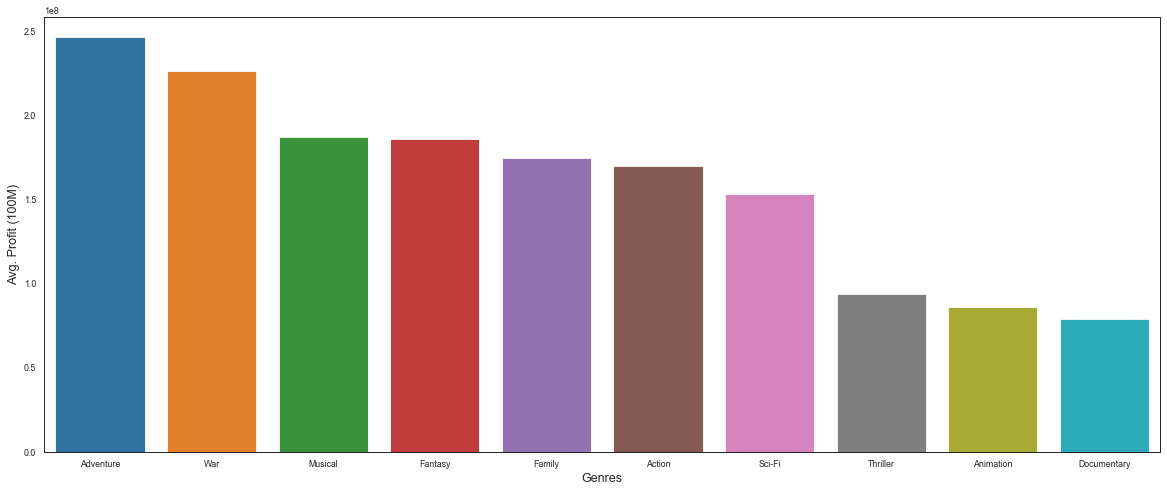

In [104]:
#Create a bar chart of average profit of each genre - Profit / Genre 

genres_top10_df.reset_index(inplace=True)

sns.set_style("white")
sns.set_context("paper", font_scale = 1, rc={"grid.linewidth": 0.6})
plt.rcParams["axes.labelsize"] = 12.5

plt.figure(figsize=(20,8))
ax = sns.barplot(x='genres', y='total_profit', data=genres_top10_df);
ax.set(xlabel="Genres", ylabel = "Avg. Profit (100M)")

In [105]:
#Now let's look at total profit / genre / time

time_genre_profit_df = genre_profit_df.groupby(['start_year', 'genres']).sum()
time_genre_profit_df.head()

production_budget  domestic_gross  worldwide_gross  \
start_year genres                                                          
2010.0     Action          3.360500e+09    3.773792e+09     9.657813e+09   
           Adventure       1.386000e+09    1.808351e+09     4.596745e+09   
           Animation       1.935000e+08    2.013298e+08     5.017684e+08   
           Biography       6.870000e+08    6.689765e+08     1.604723e+09   
           Comedy          1.310700e+09    1.186735e+09     2.464070e+09   

                      total_profit  profit_margin  
start_year genres                                  
2010.0     Action     6.297313e+09     -82.166505  
           Adventure  3.210745e+09       9.070844  
           Animation  3.082684e+08       1.925870  
           Biography  9.177229e+08     -98.460906  
           Comedy     1.153370e+09    -345.767313

[Text(0, 0.5, 'Total Profit (Billions)'), Text(0.5, 0, 'Year')]

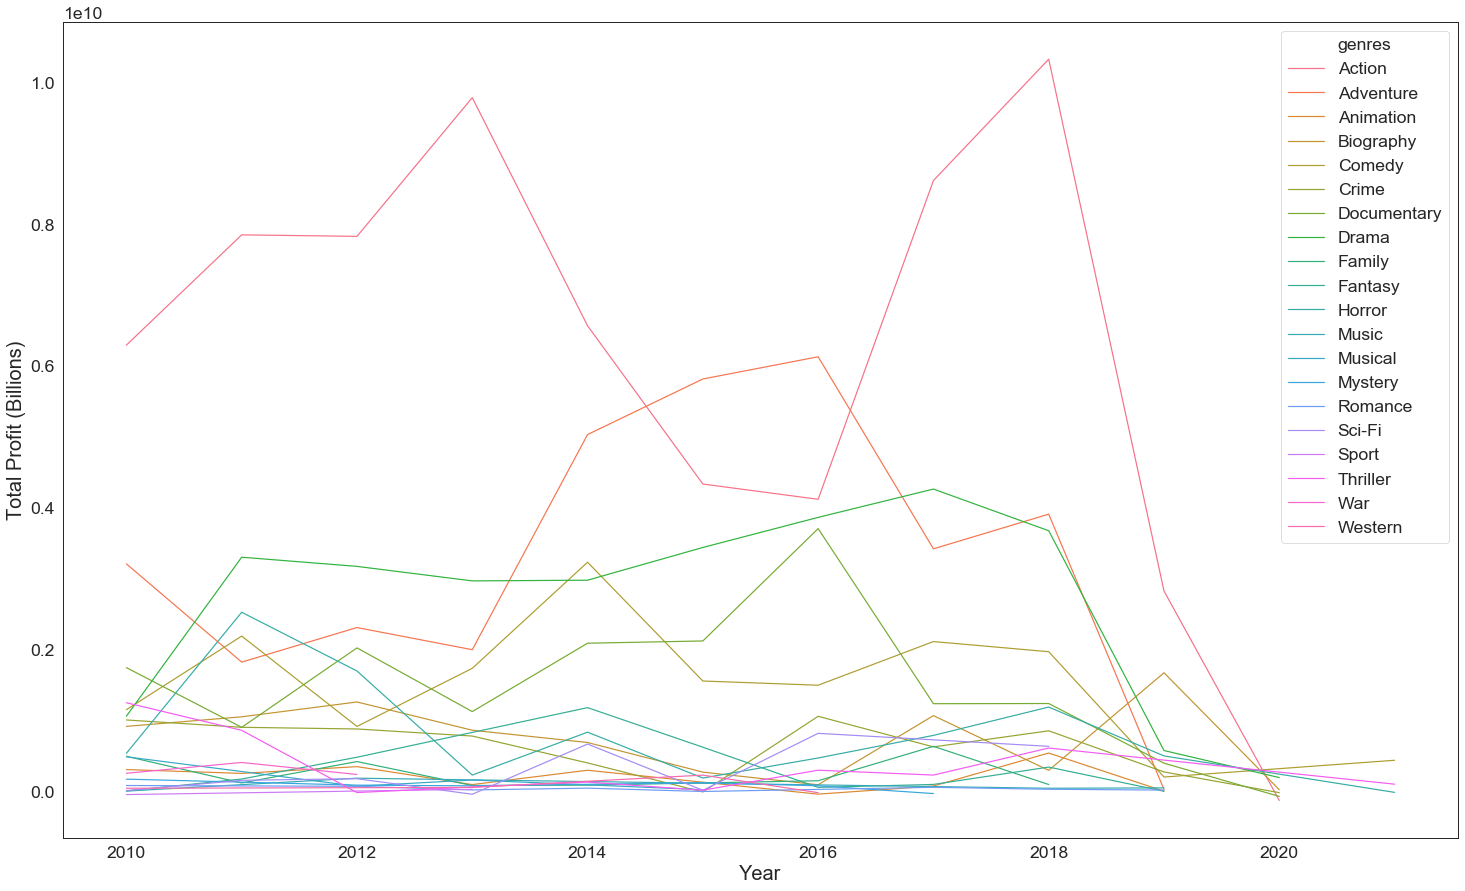

In [106]:
#Create a line graph with this table - 

line_df = time_genre_profit_df.reset_index()
sns.set_context("paper", font_scale = 2, rc={"grid.linewidth": 0.6})
plt.rcParams["axes.labelsize"] = 20
plt.figure(figsize=(25,15))
px = sns.lineplot(x="start_year", y="total_profit", hue="genres",
                  data=line_df)

px.set(xlabel="Year", ylabel = "Total Profit (Billions)")

In [107]:
#To get results that remove some of the less common genres

#We group by the first level of the index

top_genres_df = time_genre_profit_df['total_profit'].groupby(level=0, group_keys=False)

In [108]:
#Then we want to sort ('order') each group and take the first 12 elements:

time2_genre_profit = top_genres_df.nlargest(12) 
time2_genre_profit.head()

start_year  genres     
2010.0      Action         6.297313e+09
            Adventure      3.210745e+09
            Documentary    1.746559e+09
            Thriller       1.251462e+09
            Comedy         1.153370e+09
Name: total_profit, dtype: float64

In [109]:
#Let's check the type

type(time2_genre_profit)

pandas.core.series.Series

In [110]:
#Convert to Dataframe

time2_genre_profit_df = time2_genre_profit.to_frame()

[Text(0, 0.5, 'Total Profit (Billions)'), Text(0.5, 0, 'Year')]

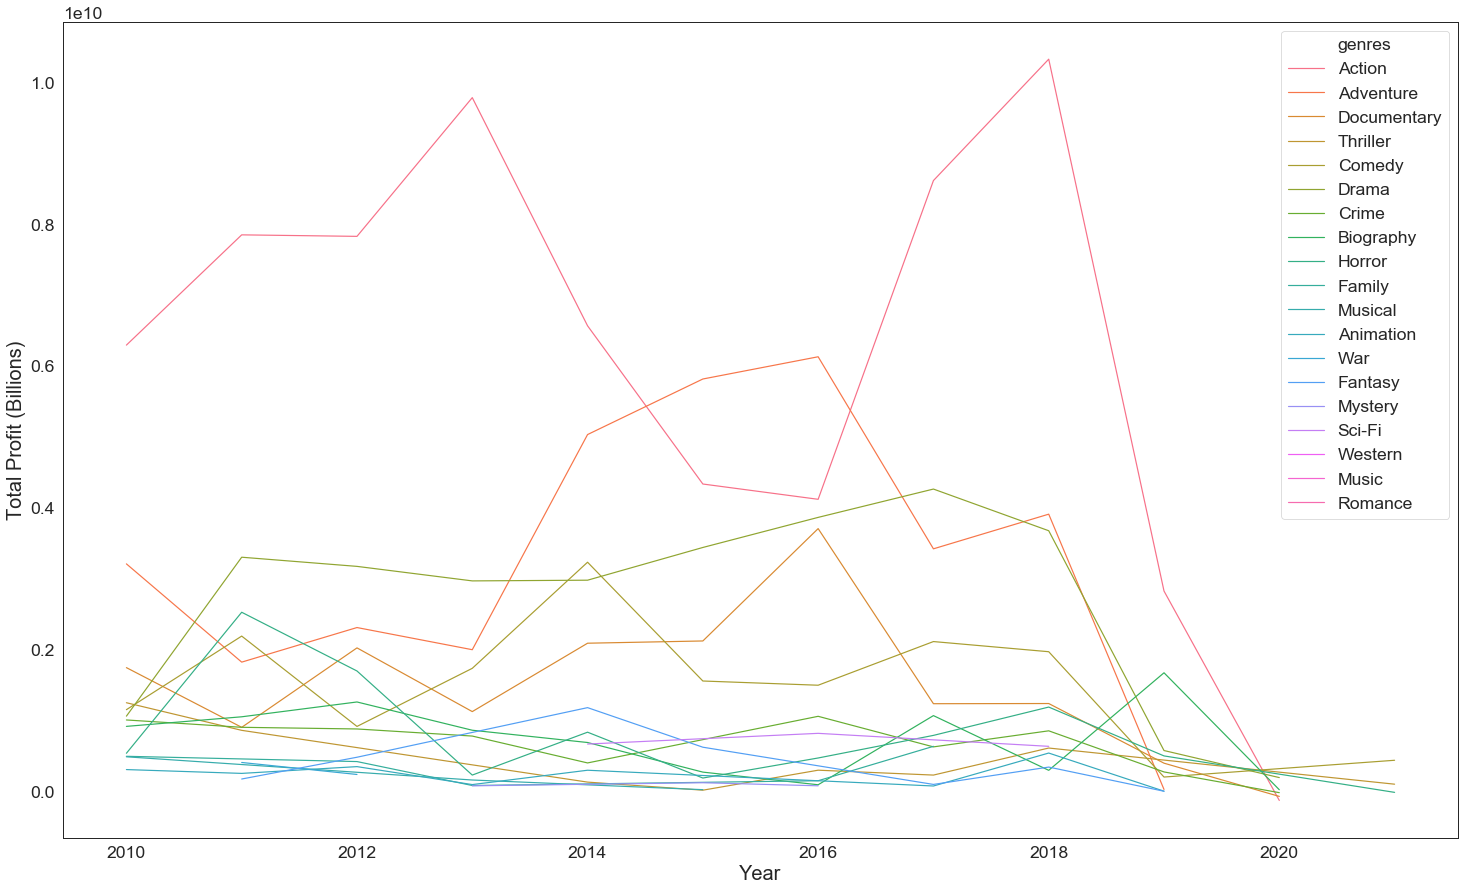

In [111]:
#Create alternative linegraph for total_profit / genre of top 12 genres each year - Profit / Genre / Time

time2_genre_profit_df = time2_genre_profit_df.reset_index()

sns.set_context("paper", font_scale = 2, rc={"grid.linewidth": 0.6})
plt.rcParams["axes.labelsize"] = 20
plt.figure(figsize=(25,15))
px2 = sns.lineplot(x="start_year", y="total_profit", hue="genres",
                  data=time2_genre_profit_df)
px2.set(xlabel="Year", ylabel = "Total Profit (Billions)")

In [112]:
#Let's explore Gross / Studio / Time

#From previous analyis we will use df_bom_financials for studio & total grossing

#From previous analysis we will use df_imdb_genre for genre

In [113]:
#Both datasets are clean 

#Using merge and using a left join. As col names are different, using left_on and right_on options

studio_movie_details_df = pd.merge(df_bom_financials, df_imdb_genre, left_on=  ['title'],
                   right_on= ['primary_title'], 
                   how = 'left')
studio_movie_details_df.head()

,studio,domestic_gross,foreign_gross,year,total_gross,primary_title,original_title,start_year,runtime_minutes,genres
0,BV,415000000.0,652000000.0,2010,1.067000e+09,Toy Story 3,Toy Story 3,2010.0,103.0,"Adventure,Animation,Comedy"
1,BV,334200000.0,691300000.0,2010,1.025500e+09,NaN,NaN,NaN,NaN,NaN
2,WB,296000000.0,664300000.0,2010,9.603000e+08,NaN,NaN,NaN,NaN,NaN
3,WB,292600000.0,535700000.0,2010,8.283000e+08,Inception,Inception,2010.0,148.0,"Action,Adventure,Sci-Fi"
4,P/DW,238700000.0,513900000.0,2010,7.526000e+08,Shrek Forever After,Shrek Forever After,2010.0,93.0,"Adventure,Animation,Comedy"


In [72]:
studio_movie_details_df.shape

(4094, 10)

In [73]:
studio_movie_details_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4094 entries, 0 to 4093
Data columns (total 10 columns):
studio             4092 non-null object
domestic_gross     4094 non-null float64
foreign_gross      2452 non-null float64
year               4094 non-null int64
total_gross        4094 non-null float64
primary_title      3314 non-null object
original_title     3314 non-null object
start_year         3314 non-null float64
runtime_minutes    3175 non-null float64
genres             3314 non-null object
dtypes: float64(5), int64(1), object(4)
memory usage: 351.8+ KB


In [74]:
#removing Nan values
studio_movie_details_df = studio_movie_details_df[studio_movie_details_df['genres'].notna()]

In [75]:
studio_movie_details_df.shape

(3314, 10)

In [76]:
#Genre is a list of upto 3 genres, splitting it to get the individual genres

studio_movie_details_df['genres'] = studio_movie_details_df['genres'].apply(lambda x: x.split(",") if x else x)
studio_movie_details_df.head()

,studio,domestic_gross,foreign_gross,year,total_gross,primary_title,original_title,start_year,runtime_minutes,genres
0,BV,415000000.0,652000000.0,2010,1.067000e+09,Toy Story 3,Toy Story 3,2010.0,103.0,"[Adventure, Animation, Comedy]"
3,WB,292600000.0,535700000.0,2010,8.283000e+08,Inception,Inception,2010.0,148.0,"[Action, Adventure, Sci-Fi]"
4,P/DW,238700000.0,513900000.0,2010,7.526000e+08,Shrek Forever After,Shrek Forever After,2010.0,93.0,"[Adventure, Animation, Comedy]"
5,Sum.,300500000.0,398000000.0,2010,6.985000e+08,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010.0,124.0,"[Adventure, Drama, Fantasy]"
6,Par.,312400000.0,311500000.0,2010,6.239000e+08,Iron Man 2,Iron Man 2,2010.0,124.0,"[Action, Adventure, Sci-Fi]"


In [77]:
#Writing code to select first genre value in each row

single_genres = pd.DataFrame(studio_movie_details_df['genres'].values.tolist()).iloc[:, [0]]
studio_movie_details_df['genres'] = single_genres 
studio_movie_details_df.head()

,studio,domestic_gross,foreign_gross,year,total_gross,primary_title,original_title,start_year,runtime_minutes,genres
0,BV,415000000.0,652000000.0,2010,1.067000e+09,Toy Story 3,Toy Story 3,2010.0,103.0,Adventure
3,WB,292600000.0,535700000.0,2010,8.283000e+08,Inception,Inception,2010.0,148.0,Adventure
4,P/DW,238700000.0,513900000.0,2010,7.526000e+08,Shrek Forever After,Shrek Forever After,2010.0,93.0,Action
5,Sum.,300500000.0,398000000.0,2010,6.985000e+08,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010.0,124.0,Adventure
6,Par.,312400000.0,311500000.0,2010,6.239000e+08,Iron Man 2,Iron Man 2,2010.0,124.0,Animation


In [78]:
#Now let's drop the columns we dont need

studio_gross_details_df = (studio_movie_details_df.drop(columns=['start_year', 'original_title', 'runtime_minutes']))
studio_gross_details_df.head()

,studio,domestic_gross,foreign_gross,year,total_gross,primary_title,genres
0,BV,415000000.0,652000000.0,2010,1.067000e+09,Toy Story 3,Adventure
3,WB,292600000.0,535700000.0,2010,8.283000e+08,Inception,Adventure
4,P/DW,238700000.0,513900000.0,2010,7.526000e+08,Shrek Forever After,Action
5,Sum.,300500000.0,398000000.0,2010,6.985000e+08,The Twilight Saga: Eclipse,Adventure
6,Par.,312400000.0,311500000.0,2010,6.239000e+08,Iron Man 2,Animation


In [79]:
#We should group by year and studio

year_graph_studio = studio_gross_details_df.groupby(['year', 'studio']).sum()
year_graph_studio.head()

domestic_gross  foreign_gross  total_gross
year studio                                            
0    0                  0.0            0.0          0.0
2010 3D           6100000.0      9900000.0   16000000.0
     ATO          1000000.0        40700.0    1040700.0
     Anch.          93100.0       480000.0     573100.0
     App.         7200000.0      2200000.0    9400000.0

In [80]:
#Drop all rows that equal 0
year_graph_studio = year_graph_studio.loc[~(year_graph_studio==0).all(axis=1)]

In [81]:
#To avoid smaller production companies crowding the bottom of our graph

#We select the the top 7 gross producing studio per year

#We group by the first level of the index:

g = year_graph_studio['total_gross'].groupby(level=0, group_keys=False)

In [82]:
#Then we want to sort ('order') each group and take the first 7 elements:

topseven_prod_comp_year = g.nlargest(7) 
topseven_prod_comp_year.head()

year  studio
2010  Uni.      2.961497e+09
      Fox       2.955400e+09
      WB        2.482156e+09
      BV        2.434937e+09
      Sum.      2.093400e+09
Name: total_gross, dtype: float64

In [83]:
#Let's check the type

type(topseven_prod_comp_year)

pandas.core.series.Series

In [86]:
#Convert to DataFrame

s = topseven_prod_comp_year.to_frame()

[Text(0, 0.5, 'Total Gross'), Text(0.5, 0, 'Year')]

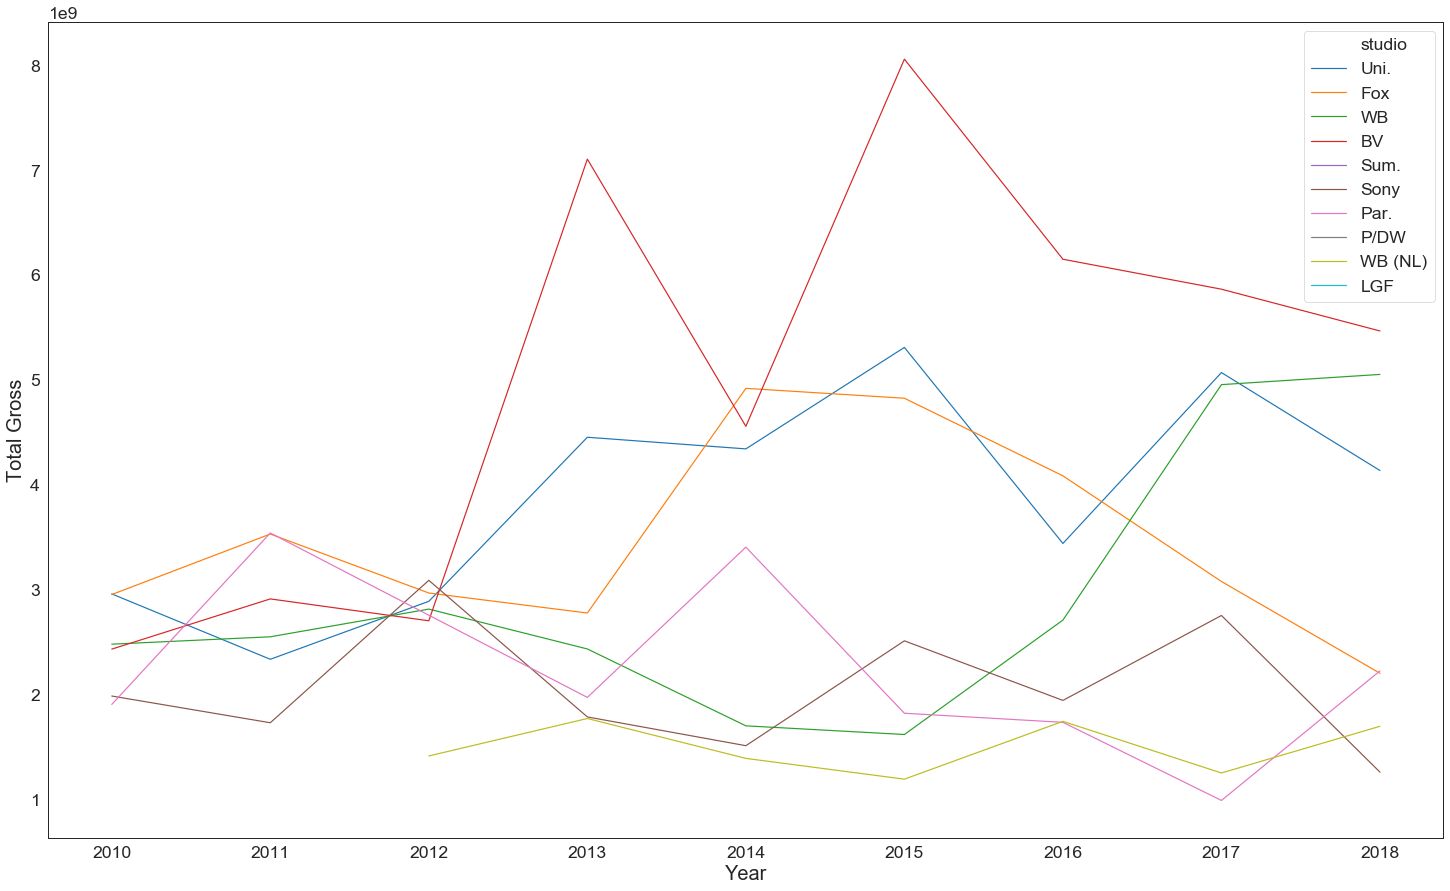

In [114]:
#Reset Index & graphing total gross of top 7 studios each year 

df_year_2 = s.reset_index()
sns.set_context("paper", font_scale = 2, rc={"grid.linewidth": 0.6})
plt.rcParams["axes.labelsize"] = 20
plt.figure(figsize=(25,15))
px3 = sns.lineplot(x="year", y="total_gross", hue="studio",
                  data=df_year_2)
px3.set(xlabel="Year", ylabel = "Total Gross")

In [94]:
#Lets find out how many films top competitors are making

#Groupby studio and year

count_graph_year = studio_gross_details_df.groupby(['studio','year']).count()
count_graph_year.head()

domestic_gross  foreign_gross  total_gross  primary_title  genres
studio year                                                                   
0      0               1324              0         1324           1324    1031
3D     2010               1              1            1              1       1
A24    2013               2              2            2              2       2
       2014               4              4            4              4       4
       2015               3              3            3              3       3

In [95]:
#Delete all rows = 0

count_graph_year = count_graph_year.loc[~(count_graph_year==0).all(axis=1)]

In [96]:
#Select the top competitors

top_comp_year = count_graph_year.loc[['Uni.','Fox','WB','BV','Sum.','Sony','Par.']]

In [97]:
top_comp_year.reset_index(inplace=True)

[Text(0, 0.5, 'Amount of Films Created'), Text(0.5, 0, 'Year')]

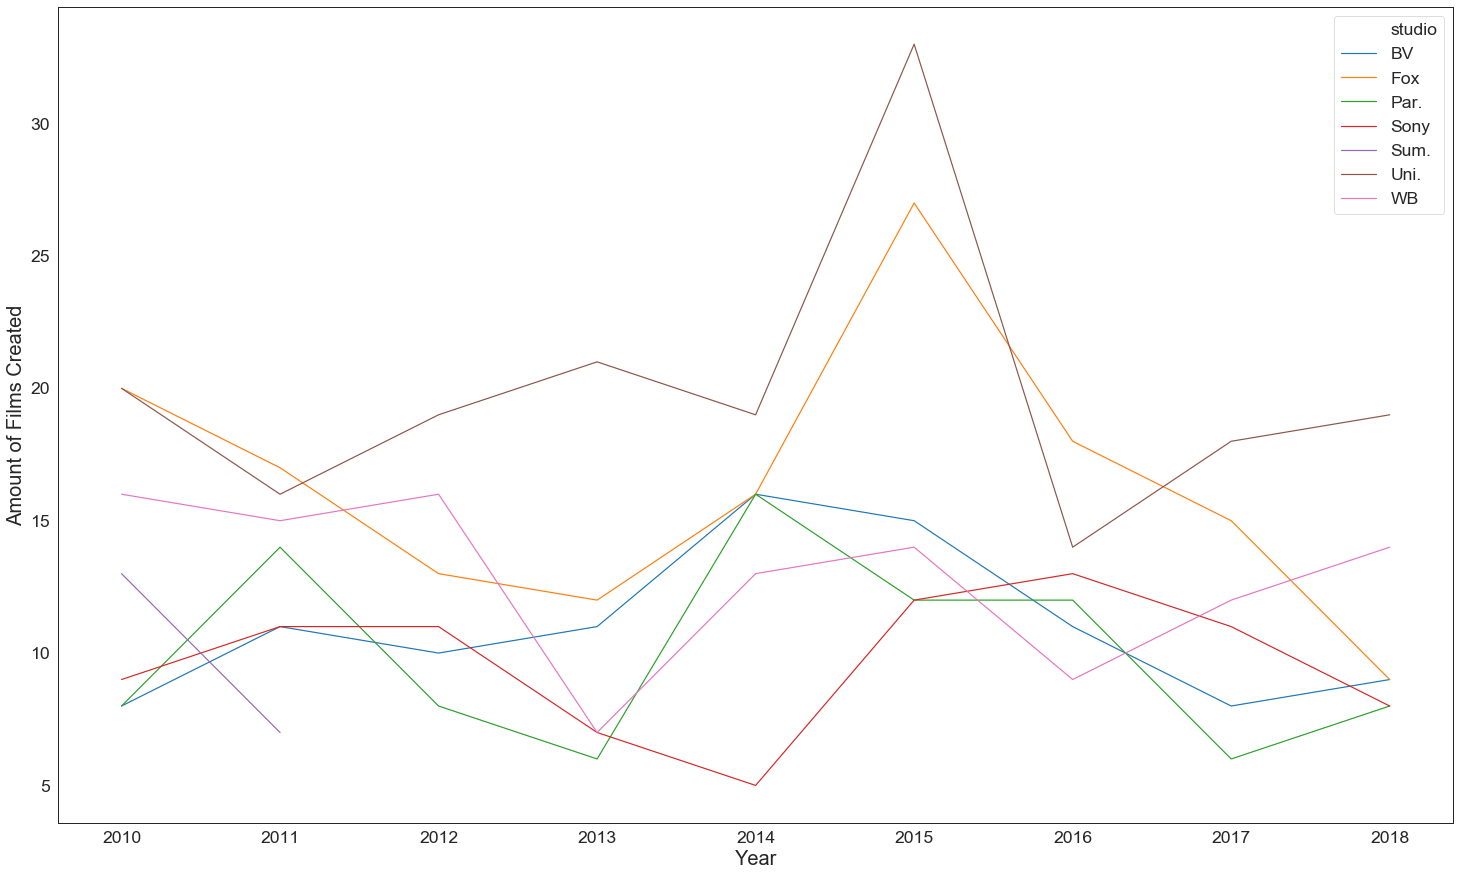

In [116]:
#Plot graph of top studios number of movies per year


sns.set_context("paper", font_scale = 2, rc={"grid.linewidth": 0.6})
plt.rcParams["axes.labelsize"] = 20
plt.figure(figsize=(25,15))
px2 = sns.lineplot(x="year", y='domestic_gross', hue="studio",
                  data=top_comp_year)
px2.set(xlabel="Year", ylabel = "Amount of Films Created")

In [ ]:
#MESS AROUND CODE BELOW

In [ ]:
#Now let's have a look at what genres of films our top competitors are making

#Drop columns that arent of interest

noyear_new_studio_movie_details_df = (studio_movie_details_df.drop(columns=['start_year', 'original_title', 'runtime_minutes', 'year']))

In [ ]:
#Groupby studio 

sum_graph_studio = noyear_new_studio_movie_details_df.groupby(['studio']).sum()

In [ ]:
#Add count of genres with studio

count_graph = noyear_new_studio_movie_details_df.groupby(['studio','genres']).count()

In [ ]:
#Select most common highest grossing studios 

top_comp = count_graph.loc[['Uni.','Fox','WB','BV','Sum.','Sony','Par.']]

In [ ]:
#Create bar chart of most common genres from our top competitors

